In [2]:
%config IPCompleter.greedy=True

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
X = iris['data']
Y = iris['target']

In [5]:
print(X.shape)
print("------")
print(Y.shape)

(150, 4)
------
(150,)


In [8]:
standardizer = StandardScaler()
X_std = standardizer.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(X_std,Y,test_size = 0.2,random_state=0)

In [17]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [18]:
from keras import models
from keras import layers

In [21]:
network = models.Sequential()
network.add(layers.Dense(units=8, activation="sigmoid", input_shape=(features_train.shape[1],)))
network.add(layers.Dense(units=3, activation="sigmoid"))


In [23]:
from keras.utils.np_utils import to_categorical

In [24]:
target_train_one_hot = to_categorical(target_train)
target_test_one_hot = to_categorical(target_test)

In [25]:
target_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [26]:
target_test_one_hot

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [27]:
network.compile(loss='mean_squared_error', optimizer='sgd', metrics=["accuracy"])

In [28]:
history = network.fit(features_train,target_train_one_hot,epochs=10000,verbose=0,batch_size=100,validation_data=(features_test, target_test_one_hot))

In [29]:
history.history

{'loss': [0.2984221279621124,
  0.29803213477134705,
  0.29762569069862366,
  0.29722362756729126,
  0.29682207107543945,
  0.2964317202568054,
  0.29604294896125793,
  0.2956484854221344,
  0.2952585220336914,
  0.29485321044921875,
  0.2944636046886444,
  0.29407018423080444,
  0.293678879737854,
  0.29328453540802,
  0.29289689660072327,
  0.292517751455307,
  0.29213136434555054,
  0.29175111651420593,
  0.29136237502098083,
  0.2909865081310272,
  0.2906075716018677,
  0.29022690653800964,
  0.2898472845554352,
  0.289468914270401,
  0.28909268975257874,
  0.2887226641178131,
  0.28834038972854614,
  0.28796446323394775,
  0.28760045766830444,
  0.2872313857078552,
  0.2868536114692688,
  0.2864830791950226,
  0.2861168086528778,
  0.2857418656349182,
  0.28537607192993164,
  0.2850107252597809,
  0.28464746475219727,
  0.28427669405937195,
  0.28391456604003906,
  0.2835606634616852,
  0.2831960916519165,
  0.28284505009651184,
  0.28248366713523865,
  0.28212910890579224,
  0.28

In [31]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [33]:
epoch_count = range(1, len(training_loss)+1)
epoch_count

range(1, 10001)

Text(0, 0.5, 'Loss')

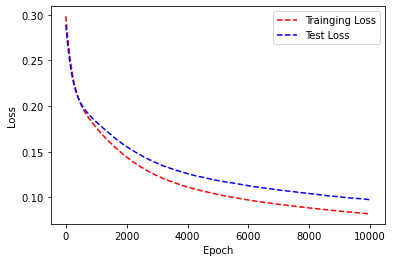

In [38]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b--")
plt.legend(["Trainging Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")

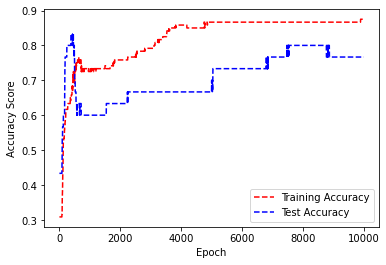

In [39]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b--")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show()

In [45]:
predicted_target = network.predict(features_test)
print("Result:")
print(predicted_target)
print("Answer:")
print(target_test_one_hot)

Result:
[[0.02850527 0.38736415 0.76516986]
 [0.0964843  0.61696    0.21124074]
 [0.8921659  0.13617712 0.02137634]
 [0.02314833 0.3350718  0.77725446]
 [0.882427   0.21035802 0.01416856]
 [0.0273149  0.2951502  0.8249116 ]
 [0.8839737  0.19870678 0.01505002]
 [0.06543541 0.2980584  0.547653  ]
 [0.04815358 0.386478   0.5362777 ]
 [0.11432818 0.4295276  0.30103236]
 [0.04856187 0.4934362  0.47840488]
 [0.10093743 0.2735309  0.46976998]
 [0.09902513 0.44089457 0.31488204]
 [0.05362928 0.40168247 0.52120554]
 [0.08541027 0.39896914 0.40685067]
 [0.8981688  0.19498917 0.01292491]
 [0.08663821 0.39930326 0.42004573]
 [0.13344443 0.5427147  0.21727547]
 [0.84844196 0.26797956 0.01603964]
 [0.8805416  0.15084699 0.02105376]
 [0.04776081 0.4269334  0.6111114 ]
 [0.13492835 0.38466865 0.3373294 ]
 [0.8825474  0.21501893 0.01418427]
 [0.8598398  0.28024638 0.0146921 ]
 [0.04276288 0.4065249  0.62013793]
 [0.9018426  0.1974408  0.01266006]
 [0.88064706 0.16606021 0.01941049]
 [0.10738975 0.39013